In [11]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Distributions in Python

<font size=3>We can represent PDFs and CDFs in python using `scipy.stats`. __They have builtin distribution types__ (eg the function that defines the PDF is some mathematical function), but note that you can also define your own CDF and PDF.

#### Normal Distribution

In [45]:
distr = scipy.stats.norm()

In [4]:
# ask for the value of PDF at a point
# returns the probability density at that point
distr.pdf(0)

0.3989422804014327

In [5]:
# ask for the value of CDF at a point
# returns the cummulative probability at that point
distr.cdf(0)

0.5

#### Plotting PDF 

Text(0, 0.5, 'PDF')

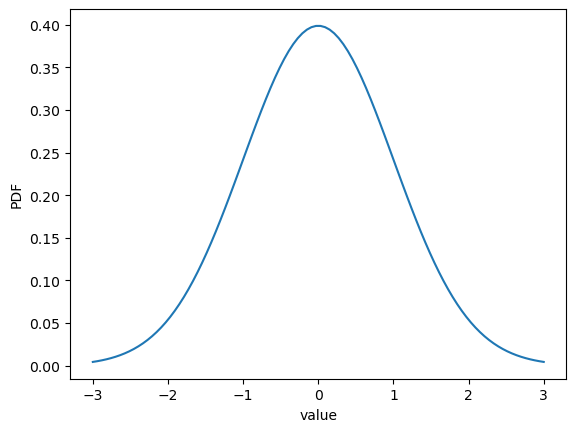

In [12]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, num=100)
sns.lineplot(x=x, y=distr.pdf(x), ax=ax)
ax.set_xlabel('value')
ax.set_ylabel('PDF')

#### Plotting CDF 

Text(0, 0.5, 'CDF')

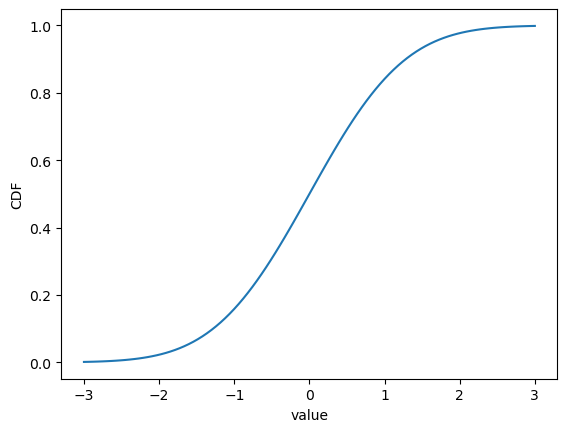

In [13]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, num=100)
sns.lineplot(x=x, y=distr.cdf(x), ax=ax)
ax.set_xlabel('value')
ax.set_ylabel('CDF')

#### Random Sampling from the distribution

In [14]:
# "rvs" means random variates
sample = distr.rvs(size=(30))

Text(0, 0.5, 'Counts in sample')

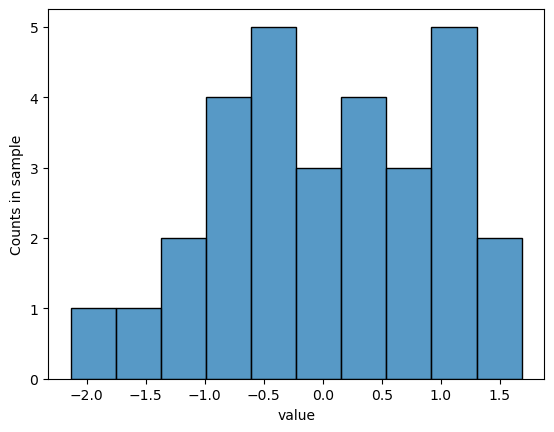

In [16]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, num=100)
sns.histplot(x=sample, ax=ax, bins=10)
ax.set_xlabel('value')
ax.set_ylabel('Counts in sample')

## Notice that the histogram doesn't have the same shape as the PDF 

In [21]:
sample1 = distr.rvs(size=(30))
sample2 = distr.rvs(size=(30))

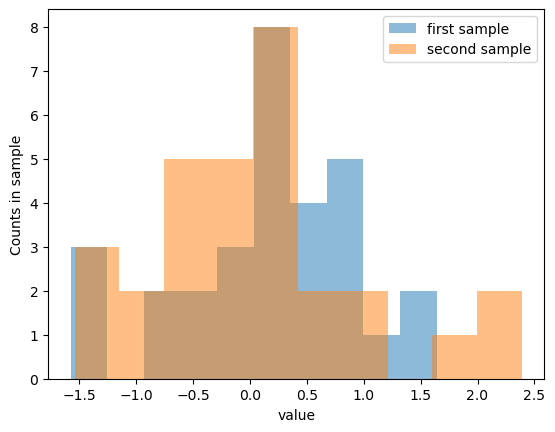

In [22]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, num=100)
ax.hist(x=sample1, label='first sample', alpha=.5)
ax.hist(x=sample2, label='second sample', alpha=.5)
ax.set_xlabel('value')
ax.set_ylabel('Counts in sample')
plt.legend()

In [23]:
sample3 = distr.rvs(size=(30), random_state=400)
sample4 = distr.rvs(size=(30), random_state=400)

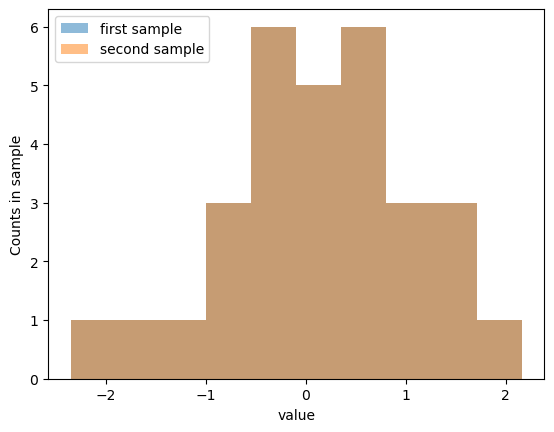

In [24]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, num=100)
ax.hist(x=sample3, label='first sample', alpha=.5)
ax.hist(x=sample4, label='second sample', alpha=.5)
ax.set_xlabel('value')
ax.set_ylabel('Counts in sample')
plt.legend()

#### Uniform Distribution

In [30]:
distuni = scipy.stats.uniform()

Text(0, 0.5, 'PDF')

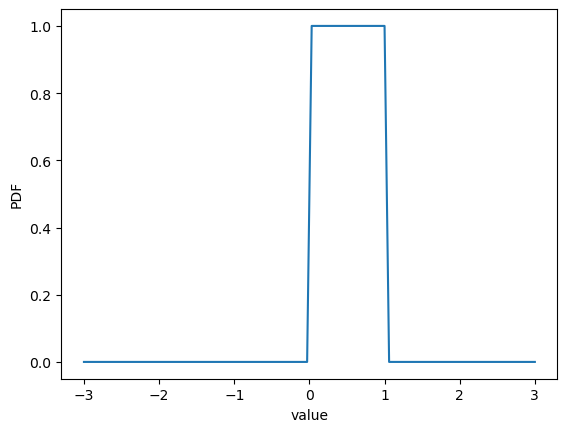

In [31]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, num=100)
sns.lineplot(x=x, y=distuni.pdf(x), ax=ax)
ax.set_xlabel('value')
ax.set_ylabel('PDF')

### Empirical Distributions

Remember our normal distribution above and the samples (sample 1-4). Mean of the normal distribution was zero and standard deviation 1

<Axes: ylabel='Count'>

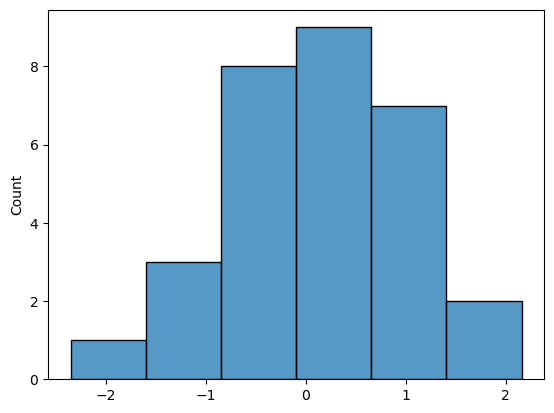

In [32]:
sns.histplot(sample3)

In [33]:
sample3.mean()

0.14085451200707855

In [34]:
sample3.std()

0.9634435600810942

<font size=3>The mean and standard deivation of the __sample are not the same as the true distribution__. Lets create an empirical PDF from the histogram above

Scipy let's us create PDFs from histograms.

What this actually does is creates an empirical CDF from the data, and interpolates and differentiates it. For more info [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html)

In [35]:
hist_data = np.histogram(sample3)
empirical_distr = scipy.stats.rv_histogram(hist_data) # create the scipy distribution

We can also use a KDE plot 

In [36]:
kde_distr = scipy.stats.gaussian_kde(sample3)

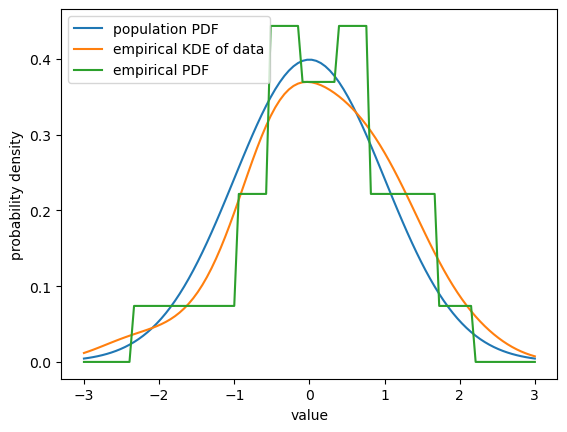

In [39]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, num=100)
ax.plot(x, distr.pdf(x), label='population PDF')
ax.plot(x, kde_distr.pdf(x), label='empirical KDE of data')
ax.plot(x, empirical_distr.pdf(x), label='empirical PDF')
ax.set_xlabel('value')
ax.set_ylabel('probability density')
plt.legend()

<font size=3>Let's quantify this difference as the average difference between the functions

In [40]:
def pdf_difference(true_pdf_vector, estimated_pdf_vector):
    """Determines the mean absolute difference between true and estimated functions evaluated on a vector."""
    return np.abs(true_pdf_vector-estimated_pdf_vector).mean()

In [42]:
print("The difference of the KDE is: ", pdf_difference(distr.pdf(x), kde_distr.pdf(x)))
print("The difference of the empirical PDF is: ", pdf_difference(distr.pdf(x), empirical_distr.pdf(x)))

The difference of the KDE is:  0.025201917401054888
The difference of the empirical PDF is:  0.04675325495116962


#### Standard Error of the Mean